In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

**Importing the dataset**

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data = pd.concat([data,pd.get_dummies(data["Gender"],prefix = "Gender")],axis = 1)
data.drop(["Gender"],axis = 1,inplace = True)
data

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


**Splitting the dataset into the Training set and Test set**

In [8]:
X = data[["Age","EstimatedSalary","Gender_Female","Gender_Male"]]
Y = data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)
X_train

,Age,EstimatedSalary,Gender_Female,Gender_Male
249,35,97000,1,0
42,35,108000,0,1
297,43,112000,1,0
127,26,32000,0,1
56,23,48000,1,0
...,...,...,...,...
73,33,113000,1,0
118,40,59000,0,1
189,28,32000,0,1
206,55,130000,1,0


**Feature Scaling**

In [11]:
std_scaler = StandardScaler()
tr_Xtrain = std_scaler.fit_transform(X_train[["Age","EstimatedSalary"]])
tr_Xtest = std_scaler.transform(X_test[["Age","EstimatedSalary"]])

In [12]:
tr_Xtrain = np.concatenate((tr_Xtrain,X_train.iloc[:,2:]),axis = 1)
tr_Xtest =  np.concatenate((tr_Xtest,X_test.iloc[:,2:]),axis = 1)

**Fitting Decision Tree Classification to the Training set**

In [18]:
tree = DecisionTreeClassifier()
param = {"criterion" : ["gini", "entropy"],"max_depth" : [2,3,4,5,6,7], "min_samples_split" : [2,4,6,8,10,12,14,16,18,20],
         "max_features" : ["auto","log2","sqrt"],"class_weight":[None,"balanced"]}

gd = GridSearchCV(tree,param)
gd.fit(tr_Xtrain,y_train)
bestParameters = gd.best_params_

In [19]:
bestParameters

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 6}

In [20]:
final_model = DecisionTreeClassifier(criterion = bestParameters['criterion'],class_weight = bestParameters["class_weight"],
                                   max_depth = bestParameters["max_depth"],max_features = bestParameters["max_features"],
                                   min_samples_split = bestParameters["min_samples_split"])
final_model.fit(tr_Xtrain,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', min_samples_split=6)

**Predicting the Test set results**

In [22]:
final_model.predict(tr_Xtest)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

**Making the Confusion Matrix**

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


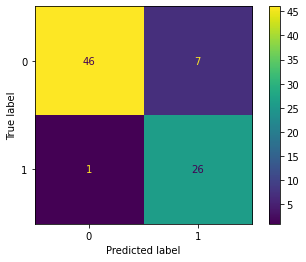

In [25]:
plot_confusion_matrix(final_model, tr_Xtest, y_test)

**Visualising the Training set results**

0.9


([<matplotlib.patches.Wedge at 0x114b17736d0>,
 [Text(-1.0461621424642782, 0.33991877217145816, 'Correctly Classified %'),
  Text(1.0461621185951564, -0.33991884563303376, 'Incorrectly Classified %')],
 [Text(-0.5706338958896062, 0.18541023936624987, '90.0%'),
  Text(0.5706338828700852, -0.1854102794362002, '10.0%')])

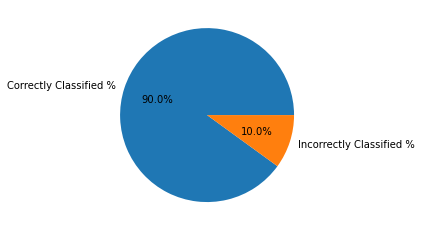

In [59]:
train_score = final_model.score(tr_Xtrain,y_train)
print(train_score)
plt.pie([100*train_score,100 - 100*train_score],labels = ["Correctly Classified %","Incorrectly Classified %"],autopct='%1.1f%%')

**Visualising the Test set results**

In [32]:
test_score = final_model.score(tr_Xtest,y_test)
test_score

0.9

([<matplotlib.patches.Wedge at 0x114b172c3d0>,
 [Text(-1.0461621424642782, 0.33991877217145816, 'Correctly Classified %'),
  Text(1.0461621185951564, -0.33991884563303376, 'Incorrectly Classified %')],
 [Text(-0.5706338958896062, 0.18541023936624987, '90.0%'),
  Text(0.5706338828700852, -0.1854102794362002, '10.0%')])

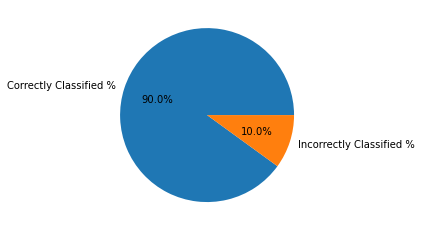

In [58]:
plt.pie([100*test_score,100 - 100*test_score],labels = ["Correctly Classified %","Incorrectly Classified %"],autopct='%1.1f%%')

<BarContainer object of 2 artists>

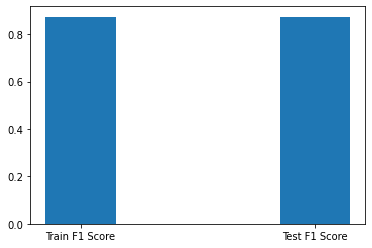

In [57]:
test_f1Score = f1_score(final_model.predict(tr_Xtest),y_test)
train_f1Score = f1_score(final_model.predict(tr_Xtrain),y_train)
plt.bar(["Train F1 Score","Test F1 Score"],[train_f1Score,train_f1Score],width = 0.3)